# Q : Predict Origin of cars using Keras

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Pranit\OneDrive\Desktop\AI\AI\Cars93.csv")
df

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


## Drop Discrete Cols

In [3]:
df.nunique().sort_values()

Man.trans.avail        2
Origin                 2
AirBags                3
DriveTrain             3
Type                   6
Passengers             6
Cylinders              6
Turn.circle           14
Luggage.room          16
Width                 16
MPG.city              21
MPG.highway           22
RPM                   24
Rear.seat.room        24
EngineSize            26
Wheelbase             27
Manufacturer          32
Fuel.tank.capacity    38
Length                51
Horsepower            57
Rev.per.mile          78
Min.Price             79
Max.Price             79
Price                 81
Weight                81
id                    93
Model                 93
Make                  93
dtype: int64

In [4]:
df = df.drop(labels=["id","Model","Make"],axis=1)

## Missing data treatment

In [5]:
df.isna().sum().sort_values()

Manufacturer           0
Turn.circle            0
Width                  0
Wheelbase              0
Length                 0
Passengers             0
Fuel.tank.capacity     0
Man.trans.avail        0
Rev.per.mile           0
Weight                 0
Horsepower             0
RPM                    0
Cylinders              0
DriveTrain             0
MPG.highway            0
MPG.city               0
Max.Price              0
Price                  0
Min.Price              0
Type                   0
EngineSize             0
Origin                 0
Rear.seat.room         2
AirBags                4
Luggage.room          11
dtype: int64

In [6]:
for i in df.columns:
    if (df[i].dtypes =="object"):
        x = df[i].mode()[0]
        df[i] = df[i].fillna(x)
    else:
        x = df[i].mean()
        df[i] = df[i].fillna(x)

In [7]:
df.isna().sum()  # missing data gone

Manufacturer          0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
dtype: int64

# X and Y

In [8]:
X = df.drop(labels=["Origin"],axis=1)
Y = df[["Origin"]]

## Preprocessing

# 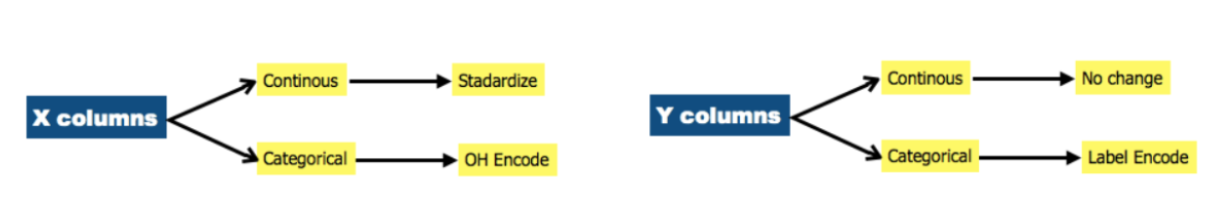

### Cat Con

In [9]:
cat = []
con = []

for i in X.columns:
    if (X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [10]:
cat ,con

(['Manufacturer',
  'Type',
  'AirBags',
  'DriveTrain',
  'Cylinders',
  'Man.trans.avail'],
 ['Min.Price',
  'Price',
  'Max.Price',
  'MPG.city',
  'MPG.highway',
  'EngineSize',
  'Horsepower',
  'RPM',
  'Rev.per.mile',
  'Fuel.tank.capacity',
  'Passengers',
  'Length',
  'Wheelbase',
  'Width',
  'Turn.circle',
  'Rear.seat.room',
  'Luggage.room',
  'Weight'])

In [11]:
X1 = pd.get_dummies(X[cat])

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Xnew = X2.join (X1)

In [12]:
Xnew

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,DriveTrain_Front,DriveTrain_Rear,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_No,Man.trans.avail_Yes
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,1,0,0,1,0,0,0,0,0,1
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,1,0,0,0,0,1,0,0,0,1
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,1,0,0,0,0,1,0,0,0,1
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1,0,0,0,0,1,0,0,0,1
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,...,1,0,0,0,1,0,0,0,0,1
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,...,1,0,0,1,0,0,0,0,0,1
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,1,0,0,0,0,1,0,0,0,1
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0,1,0,1,0,0,0,0,0,1


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = le.fit_transform(Y["Origin"])

## train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(Xnew , Ynew , test_size= 0.2 , random_state= 21)

# Neural Networks

In [15]:
from keras.models import Sequential     # model
from keras.layers import Dense          # dense states that every neuron is connected to each other

nn = Sequential()
nn.add(Dense(32,input_dim = len(Xnew.columns)))   # input layer
nn.add(Dense(100))                             # hidden layer
nn.add(Dense(1, activation= "sigmoid"))        # output layer

In [16]:
nn.compile(loss = "binary_crossentropy", metrics=["accuracy"])
model = nn.fit(Xnew , Ynew , validation_split= 0.2, epochs=15)

Epoch 1/15
3/3 [==============================] - 1s 88ms/step - loss: 0.7301 - accuracy: 0.5000 - val_loss: 0.5458 - val_accuracy: 0.8947
Epoch 2/15
3/3 [==============================] - 0s 16ms/step - loss: 0.5318 - accuracy: 0.7703 - val_loss: 0.4743 - val_accuracy: 0.8421
Epoch 3/15
3/3 [==============================] - 0s 14ms/step - loss: 0.4825 - accuracy: 0.7838 - val_loss: 0.4785 - val_accuracy: 0.8421
Epoch 4/15
3/3 [==============================] - 0s 14ms/step - loss: 0.4563 - accuracy: 0.7703 - val_loss: 0.4627 - val_accuracy: 0.8421
Epoch 5/15
3/3 [==============================] - 0s 13ms/step - loss: 0.4278 - accuracy: 0.7838 - val_loss: 0.4243 - val_accuracy: 0.8421
Epoch 6/15
3/3 [==============================] - 0s 8ms/step - loss: 0.4065 - accuracy: 0.7973 - val_loss: 0.4596 - val_accuracy: 0.7895
Epoch 7/15
3/3 [==============================] - 0s 9ms/step - loss: 0.3886 - accuracy: 0.8378 - val_loss: 0.3989 - val_accuracy: 0.8421
Epoch 8/15
3/3 [=============

## Plot results

In [17]:
model.history

{'loss': [0.7300596833229065,
  0.5318318605422974,
  0.48245877027511597,
  0.4563058912754059,
  0.42783263325691223,
  0.406537801027298,
  0.38858768343925476,
  0.3790663778781891,
  0.34959879517555237,
  0.332021564245224,
  0.3147567808628082,
  0.3112064003944397,
  0.2949737012386322,
  0.2723223865032196,
  0.2596512734889984],
 'accuracy': [0.5,
  0.7702702879905701,
  0.7837837934494019,
  0.7702702879905701,
  0.7837837934494019,
  0.7972972989082336,
  0.837837815284729,
  0.8243243098258972,
  0.8648648858070374,
  0.8783783912658691,
  0.8648648858070374,
  0.8783783912658691,
  0.9054054021835327,
  0.8918918967247009,
  0.9054054021835327],
 'val_loss': [0.5458216667175293,
  0.474308580160141,
  0.4784879684448242,
  0.4627474248409271,
  0.42428499460220337,
  0.4595695734024048,
  0.3989008963108063,
  0.39471620321273804,
  0.419847697019577,
  0.41633909940719604,
  0.4565700590610504,
  0.5025092363357544,
  0.36633169651031494,
  0.3772188425064087,
  0.392456

In [18]:
tr_acc = model.history["accuracy"]
ts_acc = model.history["val_accuracy"]

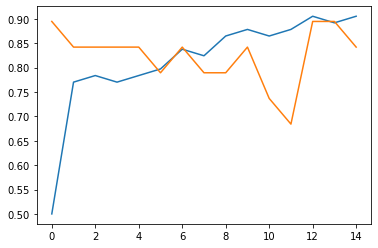

In [19]:
import matplotlib.pyplot as plt
plt.plot(tr_acc)
plt.plot(ts_acc)

In [20]:
nn.compile(loss="binary_crossentropy",metrics=["accuracy"])
model1 = nn.fit(Xnew,Ynew,validation_split=0.2,epochs=30,batch_size=20)

Epoch 1/30
4/4 [==============================] - 1s 44ms/step - loss: 0.2814 - accuracy: 0.9054 - val_loss: 0.2969 - val_accuracy: 0.9474
Epoch 2/30
4/4 [==============================] - 0s 16ms/step - loss: 0.2162 - accuracy: 0.9054 - val_loss: 0.3294 - val_accuracy: 0.8421
Epoch 3/30
4/4 [==============================] - 0s 10ms/step - loss: 0.1972 - accuracy: 0.9324 - val_loss: 0.3067 - val_accuracy: 0.9474
Epoch 4/30
4/4 [==============================] - 0s 7ms/step - loss: 0.1745 - accuracy: 0.9595 - val_loss: 0.3128 - val_accuracy: 0.8421
Epoch 5/30
4/4 [==============================] - 0s 11ms/step - loss: 0.1539 - accuracy: 0.9865 - val_loss: 0.2732 - val_accuracy: 0.9474
Epoch 6/30
4/4 [==============================] - 0s 11ms/step - loss: 0.1559 - accuracy: 0.9865 - val_loss: 0.3171 - val_accuracy: 0.8421
Epoch 7/30
4/4 [==============================] - 0s 11ms/step - loss: 0.1322 - accuracy: 0.9865 - val_loss: 0.2547 - val_accuracy: 0.9474
Epoch 8/30
4/4 [============

In [21]:
tr_acc = model1.history["accuracy"]
ts_acc = model1.history["val_accuracy"]

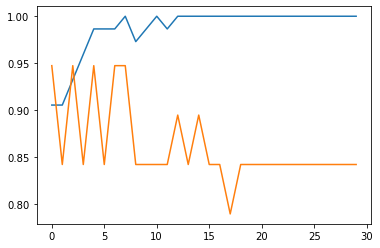

In [22]:
plt.plot(tr_acc)
plt.plot(ts_acc)

# for Epochh 7 we got Training Acc of : 0.9865 and Testing_accuracy: 0.9474

In [23]:
pred =nn.predict(Xnew)

3/3 [==============================] - 0s 9ms/step


In [24]:
Q = []
for i in nn.predict(Xnew):
    if(i[0]<0.5):
        Q.append(0)
    else:
        Q.append(1)

3/3 [==============================] - 0s 1000us/step


In [25]:
df["Origin_pred"] = le.inverse_transform(Q)         # transforming Y to its original form

In [34]:
df[["Origin_pred"]].head(15)        # this is our final predicted Origin of Cars

,Origin_pred
0,non-USA
1,non-USA
2,non-USA
3,non-USA
4,non-USA
5,USA
6,USA
7,USA
8,USA
9,USA


In [33]:
df[["Origin"]].head(15)

,Origin
0,non-USA
1,non-USA
2,non-USA
3,non-USA
4,non-USA
5,USA
6,USA
7,USA
8,USA
9,USA
